In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline 

In [2]:
# Read the train & test data
df_train=pd.read_excel('Data_Train.xlsx')
df_test=pd.read_excel('Test_set.xlsx')
df=pd.concat([df_train,df_test],axis=0,sort=False)
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270.0
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087.0
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625.0


In [3]:
# Converting the date into seerate columns
df.Date_of_Journey=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y')
df['Day_of_journey']=df['Date_of_Journey'].map(lambda x:dt.datetime.strftime(x,'%d',))
df['Month_of_journey']=df['Date_of_Journey'].map(lambda x:dt.datetime.strftime(x,'%m'))

df.head(10)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,01,05
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,09,06
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,24,06
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,12,03
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270.0,01,03
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087.0,12,03
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625.0,27,05


In [4]:
# Converting the Dep_time into seperate columns
df['dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute
# Converting the Dep_time into seperate columns
df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute




In [6]:
# Converting "Duration" column into two seperte columns(dur_hour,dur_min) using for loop 

dur_hour=[]
dur_min=[]
for i in df['Duration']:
    if 'h' not in i:
        dur_min.append(i.split('m')[0])
        dur_hour.append('0')
     
        
    elif ('h'and'm') in i:
        dur_hour.append(i.split('h')[0])
        dur_min.append(i.split('h')[-1].split('m')[0].split()[-1])
    
    elif 'm' not in i:
        dur_hour.append(i.split('h')[0])
        dur_min.append('0')
    
 
        
        

df['dur_hour']=dur_hour
df['dur_min']=dur_min








    

In [8]:
# Converting the dtypes of few columns
def strconv(col,typ):
    df[col]=df[col].astype(typ)

obj_col=['Day_of_journey','Month_of_journey','dur_hour','dur_min']
for col in obj_col:
    strconv(col,int)
df
      
        

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_journey,Month_of_journey,dep_hour,dep_min,Arrival_hour,Arrival_min,dur_hour,dur_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,16,50,21,35,4,45
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,24,6,9,0,11,25,2,25
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0,12,3,18,55,10,25,15,30
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270.0,1,3,8,0,5,5,21,5
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087.0,12,3,8,55,10,25,25,30
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625.0,27,5,11,25,19,15,7,50


In [9]:
# Dropping columns which are not required.These columns(Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Additional_Info) 
# are either split into another column or doesn't impact on the model much.

drop_col=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Additional_Info']
df=df.drop(drop_col,axis=1)
df.head()



,Airline,Source,Destination,Total_Stops,Price,Day_of_journey,Month_of_journey,dep_hour,dep_min,Arrival_hour,Arrival_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,non-stop,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302.0,1,3,16,50,21,35,4,45


In [10]:
# Removing the null values
df=df[df['Total_Stops'].notna()]
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Price               2671
Day_of_journey         0
Month_of_journey       0
dep_hour               0
dep_min                0
Arrival_hour           0
Arrival_min            0
dur_hour               0
dur_min                0
dtype: int64

In [11]:
# One-hot Encoding for Categorical features
cat_col=['Airline','Source','Destination']
enc_cat_col=pd.get_dummies(df[cat_col],drop_first=True)
df_new=pd.concat([df,enc_cat_col],axis=1)

df_new=df_new.drop(columns={'Airline','Source','Destination'},axis=1)
df_new

,Total_Stops,Price,Day_of_journey,Month_of_journey,dep_hour,dep_min,Arrival_hour,Arrival_min,dur_hour,dur_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,non-stop,3897.0,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662.0,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882.0,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,6218.0,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1 stop,13302.0,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
5,non-stop,3873.0,24,6,9,0,11,25,2,25,...,0,0,0,1,0,0,0,0,0,0
6,1 stop,11087.0,12,3,18,55,10,25,15,30,...,0,0,0,0,0,0,0,0,0,1
7,1 stop,22270.0,1,3,8,0,5,5,21,5,...,0,0,0,0,0,0,0,0,0,1
8,1 stop,11087.0,12,3,8,55,10,25,25,30,...,0,0,0,0,0,0,0,0,0,1
9,1 stop,8625.0,27,5,11,25,19,15,7,50,...,0,0,1,0,0,1,0,0,0,0


In [12]:
# The categories in Total_Stops column seems to be ordinal so we  can use Lable encoder or manually replace it.
# As the number of categories in this column is less we can also replace it manually.

df_new['Total_Stops'].replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace=True)


In [13]:
# As the pre-processing is completed we can now split the whole data into train and test data.

df_new_train=df_new[df_new['Price'].notna()]
df_new_test=df_new[df_new['Price'].isnull()]

df_new_Xtrain=df_new_train.drop(['Price'],axis=1)
df_new_Ytrain=df_new_train['Price']

new_xtest=df_new_test.drop(['Price'],axis=1)
new_ytest=df_new_test['Price']



In [15]:
# Importing train_test_split to split the train data into train data :
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df_new_Xtrain,df_new_Ytrain,test_size=0.3,random_state=32)

## Model Building 


In [16]:
# Fitting the model
from sklearn.ensemble import RandomForestRegressor
rr=RandomForestRegressor()
rr.fit(X_train,Y_train)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
# Predicting Y-train
y_train_pred=rr.predict(X_train)
from sklearn import metrics
print('Mean absolute error:',metrics.mean_absolute_error(Y_train,y_train_pred))
print('Mean squared error:',metrics.mean_squared_error(Y_train,y_train_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train,y_train_pred)))
print("R-squared value of predictions:",round(metrics.r2_score(Y_train,y_train_pred),3))

Mean absolute error: 550.3762411029336
Mean squared error: 943338.351980371
RMSE: 971.2560692116014
R-squared value of predictions: 0.958


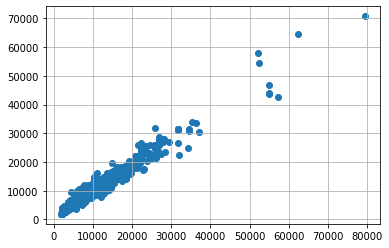

In [18]:
# Plotting the scatter plot for ytrain vs predicted y train
plt.scatter(Y_train,y_train_pred)
plt.xlabel=('Actual train Y')
plt.ylabel=(' train y pred')
plt.grid()
plt.show()

In [19]:
# Predicting Y-test(test of the train data)
y_test_pred=rr.predict(X_test)
print('Mean absolute error:',metrics.mean_absolute_error(Y_test,y_test_pred))
print('Mean squared error:',metrics.mean_squared_error(Y_test,y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_test_pred)))  
print("R-squared value of predictions:",round(metrics.r2_score(Y_test,y_test_pred),3))                     
                      



Mean absolute error: 1186.2353245638571
Mean squared error: 3489970.4110003663
RMSE: 1868.1462498959675
R-squared value of predictions: 0.812


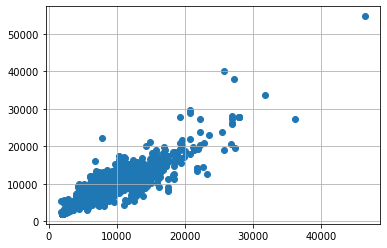

In [20]:
# Plotting the scatter plot for ytest(test set of the train data) vs Predicted y
plt.scatter(Y_test,y_test_pred)
plt.xlabel=('Actual test Y')
plt.ylabel=(' test y pred')
plt.grid()
plt.show()

# Randomised Search CV :

In [70]:
# Creating the parameters for random search
param={'n_estimators':[n for n in range (100,1000,100) ] ,
               'max_features': ['auto','sqrt',5,10,15,20],
               'max_depth': [d for d in range (2,10,1)],
               'min_samples_split': [5,10,15,20,25,30,40,50,75,100],
               'min_samples_leaf': [2,5,10,20]}

In [71]:
#Importing RandomisedSearchCv and performing random search for 10 iterations and cross validation=5

from sklearn.model_selection import RandomizedSearchCV 
rand_rr=RandomizedSearchCV(estimator=rr,param_distributions=param,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=10,n_jobs=-1)

In [72]:
# Fitting the rand_rr with train data
rand_rr.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   32.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [73]:
rand_rr.best_params_

{'n_estimators': 600,
 'min_samples_split': 25,
 'min_samples_leaf': 2,
 'max_features': 10,
 'max_depth': 9}

In [74]:
# Predict y_test(test set of the train data) and calculating the metrics:
y_test_pred=rand_rr.predict(X_test)
print('Mean absolute error:',metrics.mean_absolute_error(Y_test,y_test_pred))
print('Mean squared error:',metrics.mean_squared_error(Y_test,y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_test_pred)))  
print("R-squared value of predictions:",round(metrics.r2_score(Y_test,y_test_pred),3))     

Mean absolute error: 1448.698208334908
Mean squared error: 3897495.3121356945
RMSE: 1974.2075149628254
R-squared value of predictions: 0.79


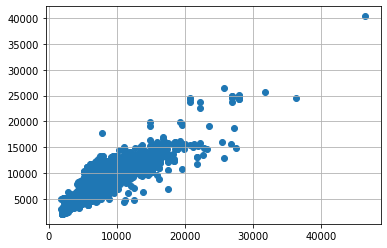

In [75]:
# Plotting the scatter plot for ytest(test set of the train data) vs Predicted y
plt.scatter(Y_test,y_test_pred)
plt.xlabel=('Actual test Y')
plt.ylabel=(' test y pred')
plt.grid()
plt.show()

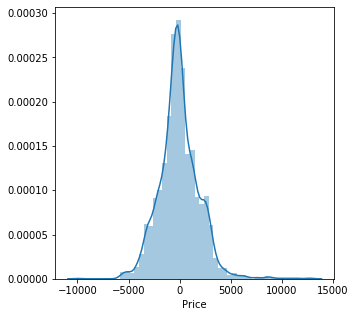

In [76]:
plt.figure(figsize = (5,5))
sns.distplot(Y_test-y_test_pred)
plt.show()


In [ ]:
# The error is normally distributed

In [77]:
# Predicting the actual test data
y_pred=rand_rr.predict(new_xtest)
y_pred
  


array([12277.24811214,  5257.92457913, 12776.70895932, ...,
       14679.68850137, 12971.15266024,  9420.5311328 ])

# Saving the model using Joblib library

In [78]:
#Importing joblib and Saving the model
import joblib
joblib.dump(rand_rr,'Flight_fare_pred.pkl')

['Flight_fare_pred.pkl']

In [79]:
# Loading the model again
Rf_model=joblib.load('Flight_fare_pred.pkl')
y_predict=Rf_model.predict(X_test)


In [80]:
print("R-squared value of predictions:",round(metrics.r2_score(Y_test,y_predict),3))  

R-squared value of predictions: 0.79
